In [2]:
!pip install MiniSom

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
som = MiniSom(x=7, y=7, input_len=4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)

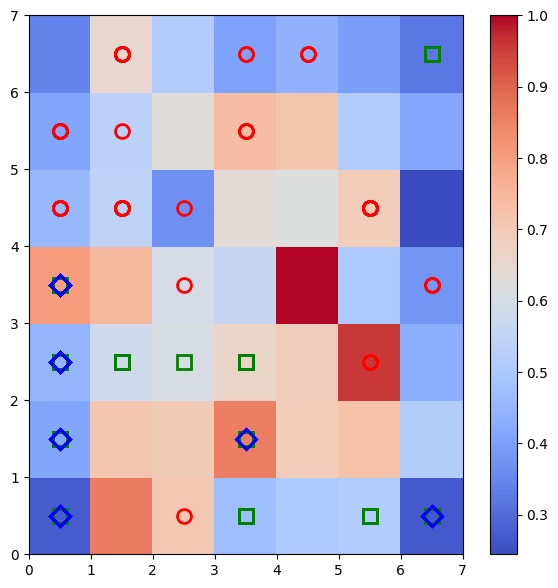

In [6]:
plt.figure(figsize=(7, 7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

for i, x in enumerate(X_scaled):
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5,
             winner[1] + 0.5,
             markers[y[i]],
             markerfacecolor='None',
             markeredgecolor=colors[y[i]],
             markersize=10,
             markeredgewidth=2)

plt.show()